### Welcome to this data analysis project.

- Let us assume that Salesforce kept campaign data for the last two years. This data comprises total sales generated 
    by newspaper, TV, and online ad campaigns and associated expenditures in US dollars.

- The aim of this project is to predict the sales based on the expenditures of ad campaigns in different media for Salesforce.


- Based on this fact, our analysis seek to provide valuable insights into the following objectives or questions.
    1. How do advertising budgets (TV, Radio, Newspaper) correlate with sales?
    2. Which advertising channel has the highest impact on sales?
    3. How do advertising budgets vary over time?
    4. What is the ROI (Return on Investment) for each advertising channel?
    5. Are there any outliers in the data that need to be investigated?

- This data analysis project was done using the following broad steps
    - Clean and prepare data
    - Exploratory analysis
    - Visualizations
    - prediction

The dataset used for this project is publicly avilable on kaggle.com

### Importing the Libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Loading the Dataset

In [160]:
sales_ad = pd.read_csv('Advertising Budget and Sales.csv')
sales_ad.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### Data Cleaning and Preprocessing

In [161]:
# drop unnamed column in the dataset
sales_ad.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [162]:
sales_ad.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [163]:
# rename columns
sales_ad = sales_ad.rename(columns={'TV Ad Budget ($)': 'TV_Ad_Budget', 'Radio Ad Budget ($)': 'Radio_Ad_Budget',
                                   'Newspaper Ad Budget ($)': 'Newspaper_Ad_Budget', 'Sales ($)': 'Sales'})

In [164]:
sales_ad.head()

,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [165]:
#check for null values
sales_ad.isna()

,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [166]:
sales_ad.isnull()

,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [167]:
sales_ad.isna().sum()

TV_Ad_Budget           0
Radio_Ad_Budget        0
Newspaper_Ad_Budget    0
Sales                  0
dtype: int64

In [168]:
sales_ad.isnull().sum()

TV_Ad_Budget           0
Radio_Ad_Budget        0
Newspaper_Ad_Budget    0
Sales                  0
dtype: int64

In [169]:
sales_ad.dtypes

TV_Ad_Budget           float64
Radio_Ad_Budget        float64
Newspaper_Ad_Budget    float64
Sales                  float64
dtype: object

In [170]:
sales_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TV_Ad_Budget         200 non-null    float64
 1   Radio_Ad_Budget      200 non-null    float64
 2   Newspaper_Ad_Budget  200 non-null    float64
 3   Sales                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [171]:
sales_ad.shape
print(f'There are %.0f rows and %.0f columns'%(sales_ad.shape[0], sales_ad.shape[1]))

There are 200 rows and 4 columns


### EDA

In [172]:
sales_ad.describe()

,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


- The mean TV Ad Budget is USD 147.04 and The standard deviation is USD 85.85
- The maximum budget for TV Ad is USD 296.40 and the minimum TV Ad budget is USD 0.70
- Average Radio Ad Budget is USD 23.26 with standard deviation of USD 14.85
- The maximum Radio Ad budget is USD 49.60 and the minimum is less than USD 1
- The mean Newspaper Ad budget is USD 30.55 and the standard deviation is USD 21.78
- The maximum Ad budget for newspaper is USD 114.00 and the minimum is USD 0.30
- The mean sales overall is USD 14.02 with standard deviation of USD 5.22
- Maximum sales volume is USD 27.00 and the minimum sales volume is USD 1.60
- More money is spent on TV Ad and Newspaper Ad

#### Data Distribution

Text(0.5, 1.0, 'Distribution of TV Ad Budget')

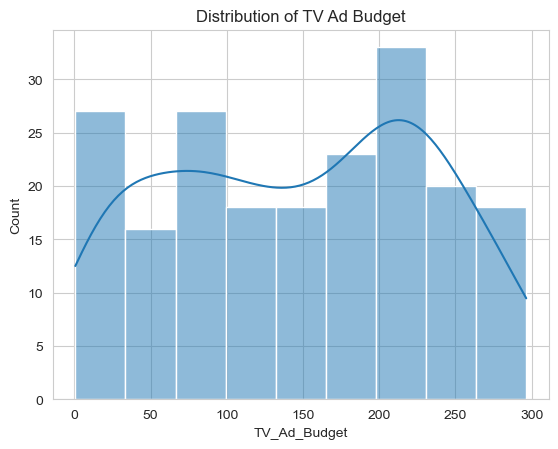

In [173]:
# distribution plot
sns.histplot(data=sales_ad, x='TV_Ad_Budget', kde=True)
plt.title('Distribution of TV Ad Budget')

Text(0.5, 1.0, 'Distribution of Radio Ad Budget')

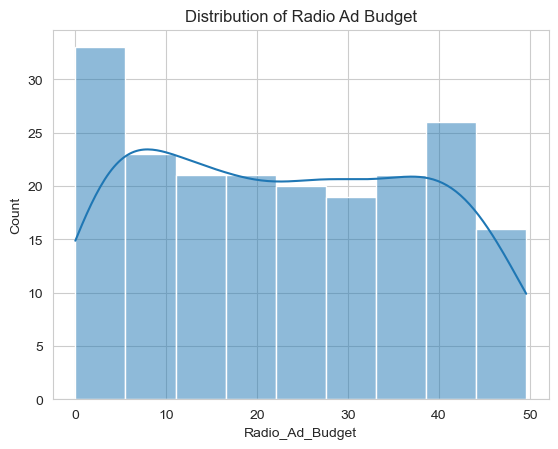

In [174]:
sns.histplot(data=sales_ad, x='Radio_Ad_Budget', kde=True)
plt.title('Distribution of Radio Ad Budget')

Text(0.5, 1.0, 'Distribution of Newspaper Ad Budget')

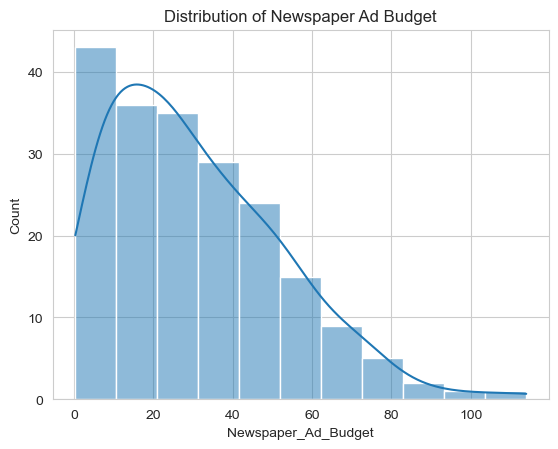

In [175]:
sns.histplot(data=sales_ad, x='Newspaper_Ad_Budget', kde=True)
plt.title('Distribution of Newspaper Ad Budget')

Text(0.5, 1.0, 'Distribution of Sales')

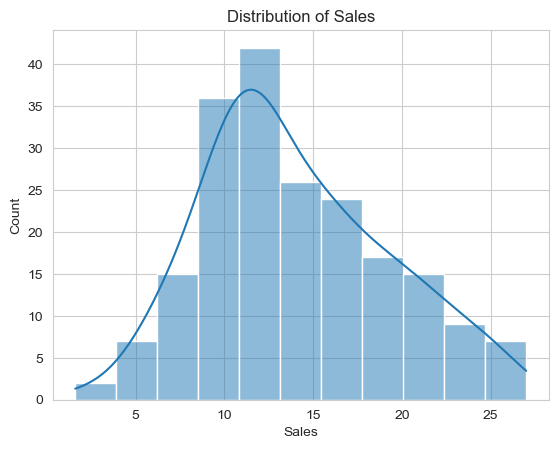

In [176]:
sns.histplot(data=sales_ad, x='Sales', kde=True)
plt.title('Distribution of Sales')

#### 1.	How do advertising budgets (TV, Radio, Newspaper) correlate with sales?

Text(0.5, 1.0, 'Scatter plot of Sales vs TV')

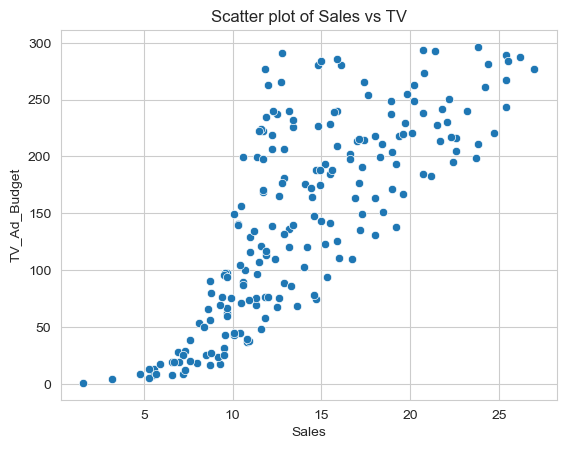

In [177]:
# correlation between TV Ad and sales
sns.scatterplot(data=sales_ad, x ='Sales', y='TV_Ad_Budget')
plt.title('Scatter plot of Sales vs TV')

Text(0.5, 1.0, 'Scatter plot of Sales vs Radio')

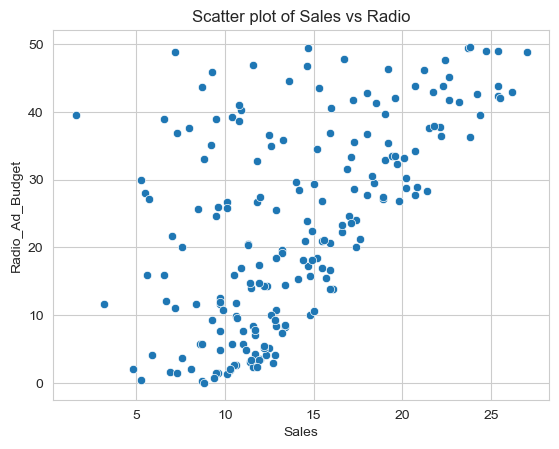

In [178]:
# Radio vs Sales
sns.scatterplot(data=sales_ad, x ='Sales', y='Radio_Ad_Budget')
plt.title('Scatter plot of Sales vs Radio')

Text(0.5, 1.0, 'Scatter plot of Sales vs Newspaper')

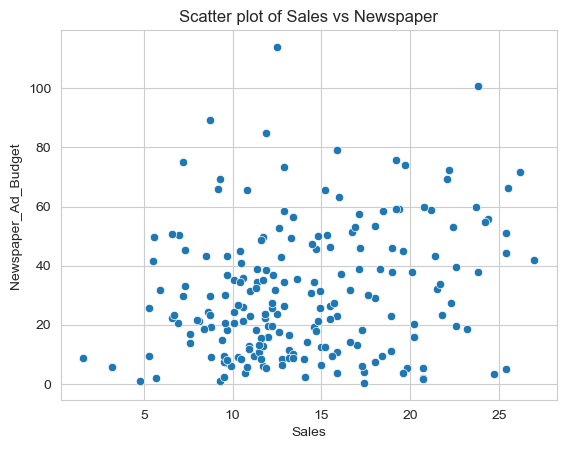

In [179]:
# Newspaper vs Sales
sns.scatterplot(data=sales_ad, x ='Sales', y='Newspaper_Ad_Budget')
plt.title('Scatter plot of Sales vs Newspaper')

Text(0.5, 1.0, 'Linear Relationship between TV and Sales')

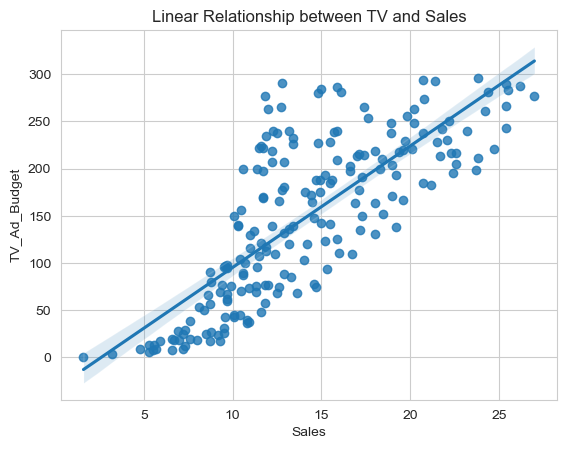

In [180]:
#Let's confirm the existence of these relationship
sns.regplot(data=sales_ad, x='Sales', y='TV_Ad_Budget')
plt.title('Linear Relationship between TV and Sales')

Text(0.5, 1.0, 'Linear Relationship between Radio and Sales')

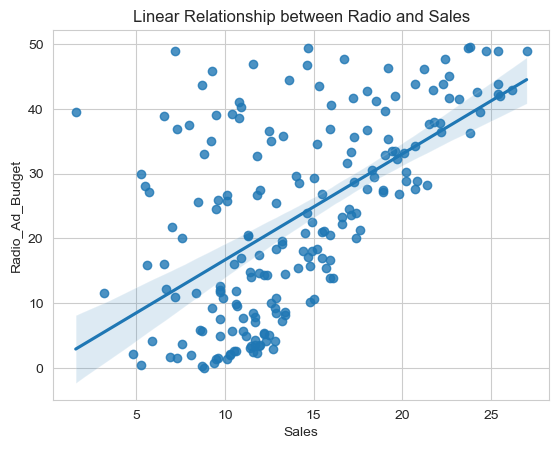

In [181]:
sns.regplot(data=sales_ad, x='Sales', y='Radio_Ad_Budget')
plt.title('Linear Relationship between Radio and Sales')

Text(0.5, 1.0, 'Linear Relationship between Newspaper and Sales')

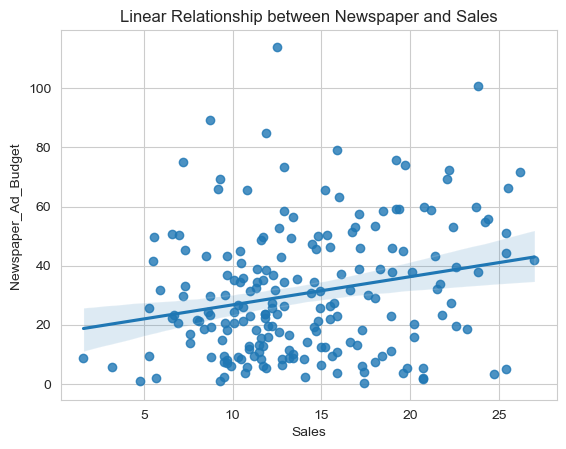

In [182]:
sns.regplot(data=sales_ad, x='Sales', y='Newspaper_Ad_Budget')
plt.title('Linear Relationship between Newspaper and Sales')

- Advertising budgets (TV, Radio, and Newspaper) have strong positive relationship with sales.
- The existence of such relationships are confirmed through linear regression plots
- TV, Radio, and Newspaper all have positive association with sales

#### 2.	Which advertising channel has the highest impact on sales?

Text(0.5, 1.0, 'Advertising channels impact on sales')

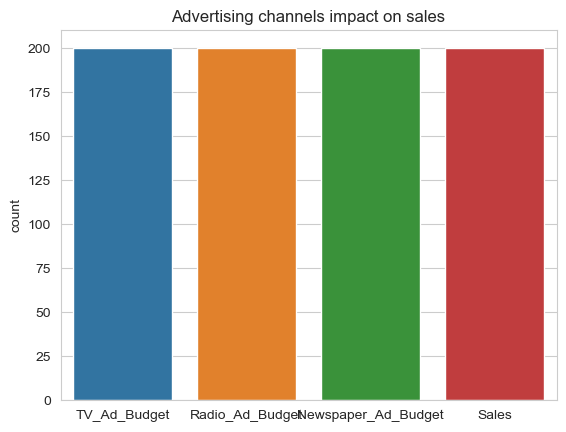

In [183]:
sns.countplot(data=sales_ad)
plt.title('Advertising channels impact on sales')

#### 3. How do advertising budgets vary over time?

In [184]:
tv = sales_ad.groupby('TV_Ad_Budget').Sales.sum().sort_values(ascending=False)
radio = sales_ad.groupby('Radio_Ad_Budget').Sales.sum().sort_values(ascending=False)
paper = sales_ad.groupby('Newspaper_Ad_Budget').Sales.sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Changes in TV Ad Budget over sales')

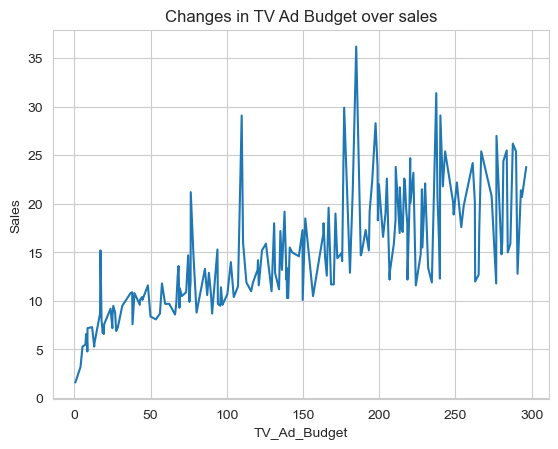

In [185]:
sns.lineplot(data=tv)
plt.title('Changes in TV Ad Budget over sales')

Text(0.5, 1.0, 'Changes in Radio Ad Budget over sales')

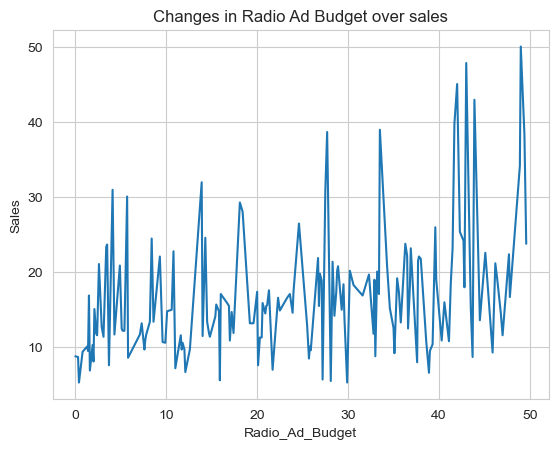

In [186]:
sns.lineplot(data=radio)
plt.title('Changes in Radio Ad Budget over sales')

Text(0.5, 1.0, 'Changes in Newspaper Ad Budget over sales')

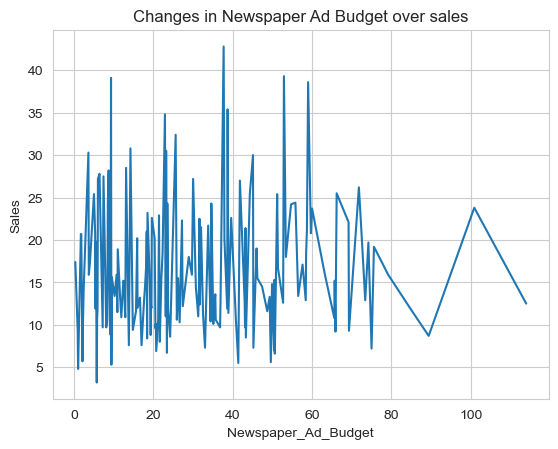

In [187]:
sns.lineplot(data=paper)
plt.title('Changes in Newspaper Ad Budget over sales')

#### 4. What is the ROI (Return on Investment) for each advertising channel?

In [188]:
#create ROI column for each advertsing channel
sales_ad['ROI_TV'] = ((sales_ad.Sales - sales_ad.TV_Ad_Budget) / sales_ad.TV_Ad_Budget) * 100

In [189]:
sales_ad.head()

,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales,ROI_TV
0,230.1,37.8,69.2,22.1,-90.395480
1,44.5,39.3,45.1,10.4,-76.629213
2,17.2,45.9,69.3,9.3,-45.930233
3,151.5,41.3,58.5,18.5,-87.788779
4,180.8,10.8,58.4,12.9,-92.865044


In [190]:
roi = sales_ad.groupby('ROI_TV').Sales.sum()

<AxesSubplot:xlabel='ROI_TV', ylabel='Sales'>

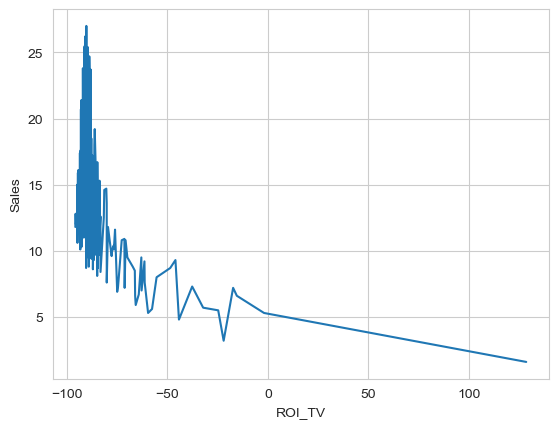

In [191]:
sns.lineplot(data=roi)

In [192]:
# for Radio
sales_ad['ROI_RD'] = ((sales_ad.Sales - sales_ad.Radio_Ad_Budget) / sales_ad.Radio_Ad_Budget) * 100
sales_ad.head()

,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales,ROI_TV,ROI_RD
0,230.1,37.8,69.2,22.1,-90.395480,-41.534392
1,44.5,39.3,45.1,10.4,-76.629213,-73.536896
2,17.2,45.9,69.3,9.3,-45.930233,-79.738562
3,151.5,41.3,58.5,18.5,-87.788779,-55.205811
4,180.8,10.8,58.4,12.9,-92.865044,19.444444


In [193]:
roi_rd = sales_ad.groupby('ROI_RD').Sales.sum()

<AxesSubplot:xlabel='ROI_RD', ylabel='Sales'>

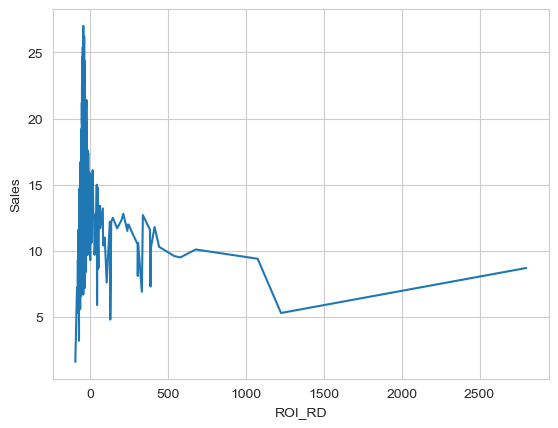

In [194]:
sns.lineplot(data=roi_rd)

In [195]:
# Newspaper
sales_ad['ROI_Paper'] = ((sales_ad.Sales - sales_ad.Newspaper_Ad_Budget) / sales_ad.Newspaper_Ad_Budget) * 100
sales_ad.head()

,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales,ROI_TV,ROI_RD,ROI_Paper
0,230.1,37.8,69.2,22.1,-90.395480,-41.534392,-68.063584
1,44.5,39.3,45.1,10.4,-76.629213,-73.536896,-76.940133
2,17.2,45.9,69.3,9.3,-45.930233,-79.738562,-86.580087
3,151.5,41.3,58.5,18.5,-87.788779,-55.205811,-68.376068
4,180.8,10.8,58.4,12.9,-92.865044,19.444444,-77.910959


<AxesSubplot:xlabel='ROI_Paper', ylabel='Sales'>

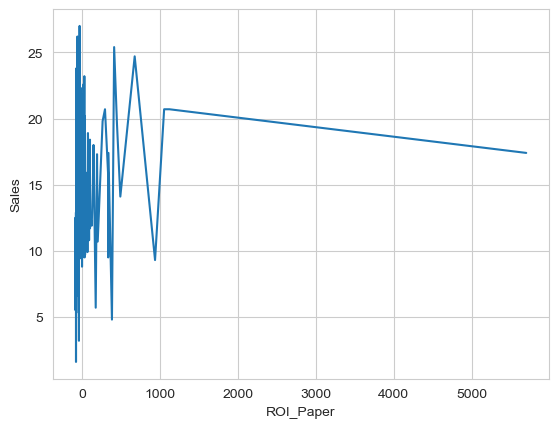

In [196]:
roi_paper = sales_ad.groupby('ROI_Paper').Sales.sum()

sns.lineplot(data=roi_paper)

- The Return on Investment (ROI) for each advertising channel shows a negative pattern
- More money is spent on TV Ad without significant sales growth
- Radio Ad have less budget with a significant increase in overall sales
- Money expended on Newspaper Ad have potntial sales growth 

<AxesSubplot:xlabel='TV_Ad_Budget'>

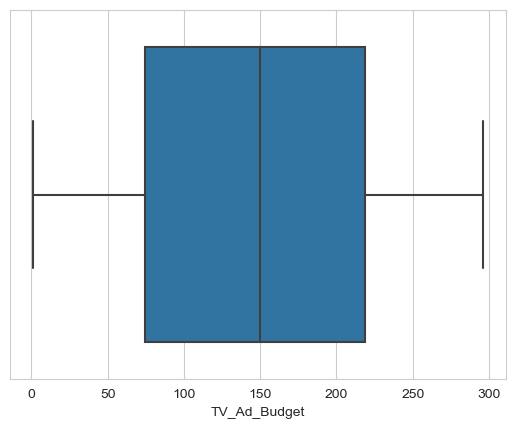

In [197]:
sns.boxplot(data=sales_ad, x='TV_Ad_Budget')

- No noticeableoutliers are detected for the overall sales

#### Building a Prediction Model using Regression

In [198]:
sales_ad.head()

,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales,ROI_TV,ROI_RD,ROI_Paper
0,230.1,37.8,69.2,22.1,-90.395480,-41.534392,-68.063584
1,44.5,39.3,45.1,10.4,-76.629213,-73.536896,-76.940133
2,17.2,45.9,69.3,9.3,-45.930233,-79.738562,-86.580087
3,151.5,41.3,58.5,18.5,-87.788779,-55.205811,-68.376068
4,180.8,10.8,58.4,12.9,-92.865044,19.444444,-77.910959


#### Setting the dependent and independent variables

In [207]:
X = np.array(sales_ad[['TV_Ad_Budget', 'Radio_Ad_Budget', 'Newspaper_Ad_Budget']])
y= np.array(sales_ad['Sales'])

#### SPlit the dataset into training and test set

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [209]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#### Predicting test set results

In [210]:
# features = [['TV_Ad_Budget', 'Radio_Ad_Budget', 'Newspaper_Ad_Budget']]
features = np.array([[200, 30, 45]])
y_pred = regressor.predict(features)
y_pred

array([17.6814422])

- Our model correctly predict sales of USD 17.73 for TV Ad Budget of USD 200, Radio Ad Budget of USD 30, and Newspaper
    Ad Budget of USD 45 respectively.

#### Evaluating Model Accuracy

In [203]:
from sklearn.metrics import accuracy_score

In [204]:
#Using mean squared error
mse = regressor.score(X_test, y_test)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.899438024100912


- The overall model accuracy is 0.899 (89.9%). This imply that approximately 90% of the variations in both the actual and predicted model is explained by the model